In [ ]:
# Importation des modules et librairies nécessaires
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Téléchargement de la dataset de Github à Google Colab et sa décompression
!wget https://github.com/fisher85/ml-cybersecurity/blob/master/python-web-attack-detection/datasets/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv.zip?raw=true -O dataset.zip
!unzip -u dataset.zip

zsh:1: no matches found: https://github.com/fisher85/ml-cybersecurity/blob/master/python-web-attack-detection/datasets/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv.zip?raw=true
unzip:  cannot find or open dataset.zip, dataset.zip.zip or dataset.zip.ZIP.


In [3]:
# Lecture de la dataset
df = pd.read_csv('Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv', encoding='cp1252')

NameError: name 'pd' is not defined

In [ ]:
# Suppression des lignes identiques 
df.columns = df.columns.str.strip()
df = df.drop(columns=['Fwd Header Length.1'])

In [ ]:
df['Label'].unique()

array(['BENIGN', 'Web Attack – Brute Force', 'Web Attack – XSS',
       'Web Attack – Sql Injection', nan], dtype=object)

In [ ]:
df['Label'].value_counts()

BENIGN                        168186
Web Attack – Brute Force        1507
Web Attack – XSS                 652
Web Attack – Sql Injection        21
Name: Label, dtype: int64

In [ ]:
# Suppression des champs vides
df = df.drop(df[pd.isnull(df['Flow ID'])].index)

In [ ]:
# Remplacement des valeurs non numériques par des valeurs numériques
df.replace('Infinity', -1, inplace=True)
df[["Flow Bytes/s", "Flow Packets/s"]] = df[["Flow Bytes/s", "Flow Packets/s"]].apply(pd.to_numeric)

In [ ]:
# Remplacement des valeurs NaN et les valeurs infinies par -1 
df.replace([np.inf, -np.inf, np.nan], -1, inplace=True)

In [ ]:
# Conversion des caractères de chaîne en nombres
string_features = list(df.select_dtypes(include=['object']).columns)
string_features.remove('Label')
string_features

['Flow ID', 'Source IP', 'Destination IP', 'Timestamp']

In [ ]:
# Convertir des caractères de chaîne en chiffres
le = preprocessing.LabelEncoder()
df[string_features] = df[string_features].apply(lambda col: le.fit_transform(col))

In [ ]:
benign_total = len(df[df['Label'] == "BENIGN"])
benign_total

168186

In [ ]:
attack_total = len(df[df['Label'] != "BENIGN"])
attack_total

2180

In [ ]:
# Le nombre des enregistrements "normaux" contre ceux contenant des attaques
df.to_csv("web_attacks_unbalanced.csv", index=False)
df['Label'].value_counts()

BENIGN                        168186
Web Attack – Brute Force        1507
Web Attack – XSS                 652
Web Attack – Sql Injection        21
Name: Label, dtype: int64

In [ ]:
# Le multiplicateur d'élargissement est utilisé pour obtenir exactement 70% de données "normales" (5087 enregistrements)
enlargement = 1.1
benign_included_max = attack_total / 30 * 70
benign_inc_probability = (benign_included_max / benign_total) * enlargement
print(benign_included_max, benign_inc_probability)

5086.666666666667 0.03326872232726466


In [ ]:
# Copie des enregistrements de df vers df_balanced, sauvegarde de la dataset web_attacks_balanced.csv
import random
indexes = []
benign_included_count = 0
for index, row in df.iterrows():
    if (row['Label'] != "BENIGN"):
        indexes.append(index)
    else:
        # Copying with benign_inc_probability
        if random.random() > benign_inc_probability: continue
        # Have we achieved 70% (5087 records)?
        if benign_included_count > benign_included_max: continue
        benign_included_count += 1
        indexes.append(index)
df_balanced = df.loc[indexes]

In [ ]:
# Visualisation
df_balanced

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
73,61908,1261,50902.0,1599,53.0,17.0,181,169.0,2.0,2.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
74,57857,1261,32798.0,1599,389.0,6.0,181,396.0,10.0,4.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
125,62866,1261,6077.0,1599,53.0,17.0,181,199.0,2.0,2.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
175,69428,1265,10515.0,1599,53.0,17.0,181,169.0,2.0,2.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
211,34618,1256,30202.0,1599,53.0,17.0,181,201.0,2.0,2.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155225,15994,1265,22.0,1591,59358.0,6.0,125,81.0,1.0,2.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
155231,87891,1660,443.0,1604,4593.0,6.0,125,126763.0,2.0,1.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
155238,7926,923,443.0,1600,53011.0,6.0,125,3.0,2.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
155241,72636,1267,53770.0,1599,53.0,17.0,125,178.0,2.0,2.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [ ]:
df_balanced.to_csv("web_attacks_balanced.csv", index=False)

In [ ]:
df = pd.read_csv('web_attacks_balanced.csv')

In [ ]:
# Normal (BENIGN) = 0, Attaque = 1
df['Label'] = df['Label'].apply(lambda x: 0 if x == 'BENIGN' else 1)

In [ ]:
# Exclusion des caractéristiques inutiles
excluded = ['Flow ID', 'Source IP', 'Source Port', 'Destination IP', 'Destination Port', 'Protocol', 'Timestamp']
df = df.drop(columns=excluded, errors='ignore')
df.shape

(7267, 77)

In [ ]:
excluded2 = ['Init_Win_bytes_backward', 'Init_Win_bytes_forward']
df = df.drop(columns=excluded2, errors='ignore')

In [ ]:
# Importation des modules et librairies nécessaires
import os
import cv2
import math
import random
import shutil
from sklearn.preprocessing import QuantileTransformer
from PIL import Image
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Transformation des données en format numérique et leurs normalisation entre 0 et 1
numeric_features = df.dtypes[df.dtypes != 'object'].index
scaler = QuantileTransformer() 
df[numeric_features] = scaler.fit_transform(df[numeric_features])

In [ ]:
# Normalisation des valeurs entre 0 et 255
df[numeric_features] = df[numeric_features].apply(
    lambda x: (x*255))

In [ ]:
df['Label'].value_counts()

0.0      5087
255.0    2180
Name: Label, dtype: int64

In [ ]:
# Selectionner les données liées aux trafics "normaux"
df0=df[df['Label']==0].drop(['Label'],axis=1)
df0

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,41.351351,88.190691,175.998498,182.507508,175.998498,167.575075,217.349850,180.082583,0.000000,162.214715,...,161.576577,174.594595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,66.576750,226.411411,212.244745,205.017991,202.672673,208.160661,0.000000,116.361353,209.567284,198.716216,...,212.500000,174.594595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,51.306306,88.190691,175.998498,182.507508,175.998498,167.575075,217.349850,180.082583,0.000000,162.214715,...,161.576577,174.594595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,41.351351,88.190691,175.998498,182.507508,175.998498,167.575075,217.349850,180.082583,0.000000,162.214715,...,161.576577,174.594595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,52.327327,88.190691,175.998498,182.507508,175.998498,167.575075,217.349850,180.082583,0.000000,162.214715,...,161.576577,174.594595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,27.184685,0.000000,175.998498,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,174.594595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7263,128.284597,88.190691,83.978979,103.633634,113.078078,99.039039,152.770270,100.825826,0.000000,113.716216,...,161.576577,49.009009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7264,3.828829,88.190691,0.000000,103.633634,0.000000,99.039039,152.770270,100.825826,0.000000,0.000000,...,161.576577,49.009009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7265,44.414414,88.190691,175.998498,164.384384,203.055556,141.539039,191.951952,151.493994,0.000000,199.099099,...,161.576577,174.594595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Selectionner les données liées aux trafics malicieux
df1=df[df['Label']==255].drop(['Label'],axis=1)
df1

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
402,162.597264,217.094595,223.093093,235.141574,224.437736,223.343584,0.0,243.768769,235.653424,223.139390,...,212.500000,174.594595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
403,152.611119,226.411411,223.093093,228.198198,244.493447,225.791506,0.0,228.882324,231.280652,253.213213,...,201.906907,174.594595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
410,27.184685,0.000000,83.978979,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,174.594595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
411,169.020639,217.094595,217.477477,234.080952,221.589556,238.755357,0.0,242.568961,243.872299,223.336774,...,201.906907,174.594595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
414,149.767194,217.094595,212.244745,234.139141,221.589556,238.933770,0.0,242.613313,244.022398,223.336774,...,201.906907,174.594595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5276,148.280232,212.244745,207.267267,222.837838,223.416918,240.450450,0.0,240.434840,247.199899,245.300300,...,161.576577,174.594595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5280,149.428947,212.244745,217.477477,222.837838,231.788951,240.450450,0.0,240.434840,247.199899,247.351041,...,161.576577,174.594595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5289,148.624806,204.969970,212.244745,222.837838,223.416918,240.450450,0.0,244.495927,248.082489,245.300300,...,161.576577,174.594595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5290,24.759760,0.000000,83.978979,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,174.594595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Creation des images selon les données liées au trafic "normal" dans le dossier ./train/1/
count=0
ims = []

image_path = "./train/1/"
try:
  os.makedirs(image_path)
except Exception:
  print('File exists')
for i in range(0, len(df0)):  
    count=count+1
    if count<=74: 
        im=df0.iloc[i].values
        ims=np.append(ims,im)
    else:
        ims=np.array(ims).reshape(74,74)
        array = np.array(ims, dtype=np.uint8)
        new_image = Image.fromarray(array)
        new_image.save(image_path+str(i)+'.png')
        count=0
        ims = []


In [ ]:
# Creation des images selon les données liées au trafic malicieux dans le dossier ./train/1/
count=0
ims = []

image_path = "./train/2/"
try:
  os.makedirs(image_path)
except Exception:
  print('File exists')
for i in range(0, len(df1)):  
    count=count+1
    if count<=74: 
        im=df1.iloc[i].values
        ims=np.append(ims,im)
    else:
        ims=np.array(ims).reshape(74,74)
        array = np.array(ims, dtype=np.uint8)
        new_image = Image.fromarray(array)
        try:
          new_image.save(image_path+str(i)+'.png')
        except Exception:
          print('not possible')
        count=0
        ims = []


Text(0.5, 1.0, 'Attack')

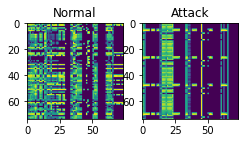

In [ ]:
# Visualisation des deux images
img1 = Image.open('./train/1/1049.png')
img2 = Image.open('./train/2/1049.png')
plt.figure(figsize=(10, 10)) 
plt.subplot(1,5,1)
plt.imshow(img1)
plt.title("Normal")
plt.subplot(1,5,2)
plt.imshow(img2)
plt.title("Attack")

In [ ]:
# Création des dossiers pour enregistrer les images
Train_Dir='./train/'
Val_Dir='./test/'
allimgs=[]
for subdir in os.listdir(Train_Dir):
    for filename in os.listdir(os.path.join(Train_Dir,subdir)):
        filepath=os.path.join(Train_Dir,subdir,filename)
        allimgs.append(filepath)
print(len(allimgs)) # Ecrire la totalité des nombres des images

96


In [ ]:
# Séparation des données de test de la dataset (train/test size = 80%/20%)
Numbers=len(allimgs)//5 	#size of test set (20%)

def mymovefile(srcfile,dstfile):
    if not os.path.isfile(srcfile):
        print ("%s not exist!"%(srcfile))
    else:
        fpath,fname=os.path.split(dstfile)    
        if not os.path.exists(fpath):
            os.makedirs(fpath)               
        shutil.move(srcfile,dstfile)          

In [ ]:
Numbers

19

In [ ]:
# Création des données de test
val_imgs=random.sample(allimgs,Numbers)
for img in val_imgs:
    dest_path=img.replace(Train_Dir,Val_Dir)
    mymovefile(img,dest_path)
print('Finish creating test set')

Finish creating test set


In [ ]:
# Redimensionnement des images 224*224 pour un entraînement CNN meilleur
def get_224(folder,dstdir):
    imgfilepaths=[]
    for root,dirs,imgs in os.walk(folder):
        for thisimg in imgs:
            thisimg_path=os.path.join(root,thisimg)
            imgfilepaths.append(thisimg_path)
    for thisimg_path in imgfilepaths:
        dir_name,filename=os.path.split(thisimg_path)
        dir_name=dir_name.replace(folder,dstdir)
        new_file_path=os.path.join(dir_name,filename)
        if not os.path.exists(dir_name):
            os.makedirs(dir_name)
        img=cv2.imread(thisimg_path)
        img=cv2.resize(img,(224,224))
        cv2.imwrite(new_file_path,img)
    print('Finish resizing'.format(folder=folder))
    

In [ ]:
DATA_DIR_224='./train_224/'
get_224(folder='./train/',dstdir=DATA_DIR_224)

Finish resizing


In [ ]:

DATA_DIR2_224='./test_224/'
get_224(folder='./test/',dstdir=DATA_DIR2_224)

Finish resizing


Text(0.5, 1.0, 'Attack')

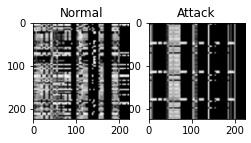

In [ ]:
# Visualisation
img1 = Image.open('./train_224/1/1049.png')
img2 = Image.open('./train_224/2/1124.png')
plt.figure(figsize=(10, 10)) 
plt.subplot(1,5,1)
plt.imshow(img1)
plt.title("Normal")
plt.subplot(1,5,2)
plt.imshow(img2)
plt.title("Attack")

In [ ]:
# Importation des modules et librairies nécessaires
import os
from keras.preprocessing.image import  ImageDataGenerator
from keras.layers import Dense,Flatten,GlobalAveragePooling2D,Input,Conv2D,MaxPooling2D,Dropout
from keras.models import Model,load_model,Sequential
from keras.applications.xception import  Xception
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.mobilenet import MobileNet
import keras.callbacks as kcallbacks
import keras
from keras.preprocessing.image import load_img,img_to_array
import math
import random
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import numpy as np
from PIL import Image
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [ ]:
# Génération des images d'entraînement et de test
TARGET_SIZE=(224,224)
INPUT_SIZE=(224,224,3)
BATCHSIZE=128	

#Normalization
train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        './train_224/',
        target_size=TARGET_SIZE,
        batch_size=BATCHSIZE,
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        './test_224/',
        target_size=TARGET_SIZE,
        batch_size=BATCHSIZE,
        class_mode='categorical')

Found 77 images belonging to 2 classes.
Found 19 images belonging to 2 classes.


In [ ]:
# Classe de visualisation
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = {'batch':[], 'epoch':[]}
        self.accuracy = {'batch':[], 'epoch':[]}
        self.val_loss = {'batch':[], 'epoch':[]}
        self.val_acc = {'batch':[], 'epoch':[]}
    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
        self.accuracy['batch'].append(logs.get('acc'))
        self.val_loss['batch'].append(logs.get('val_loss'))
        self.val_acc['batch'].append(logs.get('val_acc'))
    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
        self.accuracy['epoch'].append(logs.get('acc'))
        self.val_loss['epoch'].append(logs.get('val_loss'))
        self.val_acc['epoch'].append(logs.get('val_acc'))
    def loss_plot(self, loss_type):
        iters = range(len(self.losses[loss_type]))
        plt.figure()
        plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
        if loss_type == 'epoch':
            # acc
            plt.plot(iters, self.accuracy[loss_type], 'r', label='train acc')
            # loss
            plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
            # val_acc
            plt.plot(iters, self.val_acc[loss_type], 'b', label='val acc')
            # val_loss
            plt.plot(iters, self.val_loss[loss_type], 'k', label='val loss')
        plt.grid(True)
        plt.xlabel(loss_type)
        plt.ylabel('acc-loss')
        plt.legend(loc="upper right")
        plt.show()

In [ ]:
# Instantiation d'objet
history_this= LossHistory()

In [ ]:
# Initialisation
num_filters = 8
filter_size = 3
pool_size = 2

In [ ]:
# Création du model
model = Sequential([
  Conv2D(num_filters, filter_size, input_shape=(224, 224, 3)),
  MaxPooling2D(pool_size=pool_size),
  Flatten(),
  Dense(2, activation='softmax'),
])

In [ ]:
# Compilation du model
model.compile(
  'adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [ ]:
# Entraînement du modèle
model.fit(
   train_generator,
   steps_per_epoch=len(train_generator),
   epochs=3,
   validation_data=validation_generator,
   validation_steps=len(validation_generator),
   callbacks=[history_this],
)

Epoch 1/3
1/1 [==============================] - 5s 5s/step - loss: 1.1657e-05 - accuracy: 1.0000 - val_loss: 1.1882e-04 - val_accuracy: 1.0000
Epoch 2/3
1/1 [==============================] - 4s 4s/step - loss: 1.2439e-05 - accuracy: 1.0000 - val_loss: 1.2574e-04 - val_accuracy: 1.0000
Epoch 3/3
1/1 [==============================] - 3s 3s/step - loss: 1.3197e-05 - accuracy: 1.0000 - val_loss: 1.3232e-04 - val_accuracy: 1.0000


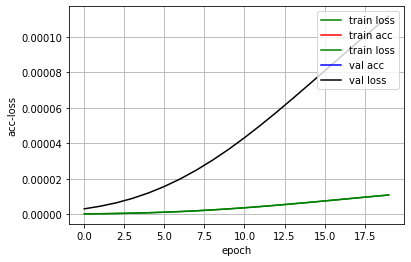

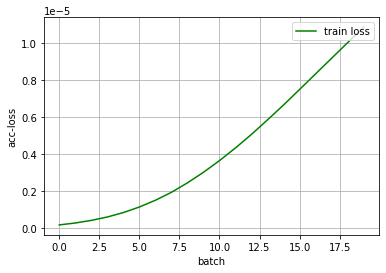

In [ ]:
# Visualisation des pertes
history_this.loss_plot('epoch')
history_this.loss_plot('batch')
plt.show()

In [ ]:
# Affectation des caractéristiques
label=validation_generator.class_indices
label={v: k for k, v in label.items()}
label

{0: '1', 1: '2'}

In [ ]:
# Lecture des images depuis le dossier de validation
rootdir = './test_224/'
test_laels = []
test_images=[]
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        if not (file.endswith(".jpeg"))|(file.endswith(".jpg"))|(file.endswith(".png")):
            continue
        test_laels.append(subdir.split('/')[-1])
        test_images.append(os.path.join(subdir, file))
        
print(test_laels[0],test_images[0])

2 ./test_224/2/2024.png


Predicted result for the first image: 2
Confidence level: 1.0


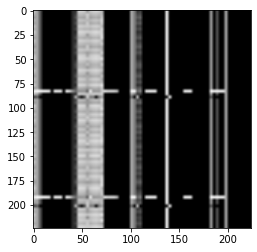

In [ ]:
# Affichage du résultat prédit et du niveau de confiance
import cv2
import matplotlib.pyplot as plt
test=cv2.imread(test_images[0])

img_show=test[:,:,[2,1,0]]
test=test/255.
test_shape=(1,)+test.shape
test=test.reshape(test_shape)

res=model.predict(test)

prob=res[0,np.argmax(res,axis=1)[0]]
res=label[np.argmax(res,axis=1)[0]]
print('Predicted result for the first image: %s'%res)
print('Confidence level: %s'%prob)
plt.imshow(img_show)
plt.show()

In [ ]:
# Détails à propos des ressources consommées
%%time
import time
predict=[]
length=len(test_images)
t1 = time.time()
for i in range(length):
    inputimg=test_images[i]
    test_batch=[]
    thisimg=np.array(Image.open(inputimg))/255 #read all the images in validation set
    #print(thisimg)
    test_shape=(1,)+thisimg.shape
    thisimg=thisimg.reshape(test_shape)
    model_batch=model.predict(thisimg) #use master model to process the input image
    #generate result by model 1
    prob=model_batch[0,np.argmax(model_batch,axis=1)[0]]
    res=label[np.argmax(model_batch,axis=1)[0]]
    predict.append(res)

CPU times: user 1.22 s, sys: 30.6 ms, total: 1.25 s
Wall time: 1.17 s


In [ ]:
# Calcul de l'accuracy, de la précision, du recall et du F1-score
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
acc=accuracy_score(test_laels,predict)
pre=precision_score(test_laels,predict,average='weighted')
re=recall_score(test_laels,predict,average='weighted')
f1=f1_score(test_laels,predict,average='weighted')
print('CNN accuracy: %s'%acc)
print('precision: %s'%pre)
print('recall: %s'%re)
print('f1: %s'%f1)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(test_laels, predict))
print(classification_report(test_laels, predict))

CNN accuracy: 1.0
precision: 1.0
recall: 1.0
f1: 1.0
[[10  0]
 [ 0  9]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         9

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

